In [27]:
# !pip3 install dotmotif networkx

from graph_analysis import triplets
import networkx as nx
from dotmotif import Motif, GrandIsoExecutor
from scipy import sparse
from tqdm import tqdm
import numpy as np

In [14]:
file_path = '/gpfs/bbp.cscs.ch/project/proj142/home/kurban/GNNplayground/notebooks/cylinder300_synaptome.npz'
target_adj = sparse.load_npz(file_path)

In [16]:
from graph_analysis import randomize

In [60]:
target_graph = nx.from_scipy_sparse_array(target_adj,create_using=nx.DiGraph())

## Try networkx randomization

So  far doesnt work for configurational model as i see degree distributions are not preserved

In [19]:
din = list(d for n, d in target_graph.in_degree())
dout = list(d for n, d in target_graph.out_degree())

In [20]:
target_configurational_directed = nx.directed_configuration_model(din,dout,create_using=nx.DiGraph,seed=42)

In [32]:
din_configurational = list(d for n, d in target_configurational_directed.in_degree())
dout_configurational = list(d for n, d in target_configurational_directed.out_degree())

In [40]:
diff = np.array(din) - np.array(din_configurational)

In [44]:
np.count_nonzero(diff)

5945

In [45]:
np.unique(diff,return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  69,  71,  72,  73,  74,  75,  76,  77,  78,  82,  84,
         85,  88,  89,  91,  92,  93,  94, 108, 112, 120, 123, 127, 132,
        134, 138, 146, 154, 157, 163, 167, 170, 173, 174, 184, 200, 202,
        205, 206, 208, 217, 227, 244]),
 array([268, 416, 462, 472, 456, 408, 378, 357, 334, 316, 279, 239, 200,
        166, 134, 161, 120, 107,  98,  76,  67,  61,  75,  40,  51,  30,
         40,  26,  25,  29,  22,  15,  29,  16,  15,  12,  10,  14,  12,
          5,  18,   6,  10,   4,  10,   5,   2,   6,   3,   4,   4,   6,
          2,   3,   3,   3,   5,   3,   5,   2,   1,   3,   1,   3,   5,
          3

In [48]:
np.mean(din_configurational), np.mean(din)

(188.34733623048447, 198.96056655399968)

In [49]:
np.mean(dout_configurational), np.mean(dout)

(188.34733623048447, 198.96056655399968)

In [59]:
np.max(dout_configurational), np.max(dout)

(2178, 2747)

In [58]:
np.mean(np.array(din_configurational) -  np.array(dout_configurational))

0.0

In [57]:
np.mean(np.array(din) -  np.array(dout))

0.0

In [37]:
np.array(din_configurational)

array([ 12,  13,   5, ..., 401, 179, 310])

In [38]:
np.array(din)

array([ 12,  13,   5, ..., 446, 189, 339])

In [7]:
Executor = GrandIsoExecutor(graph=target_graph)

In [25]:
target_graph

In [8]:
complex_motif = Motif("""
# One-direction edge
uniedge(n, m) {
    n -> m
    m !> n
}

# One-direction triangle
unitriangle(x, y, z) {
    uniedge(x, y)
    uniedge(y, z)
    uniedge(z, x)
}

unitriangle(A, B, C)
""") # specific case not like motif2 where edges can also be biedge/uniedge

In [9]:
results = Executor.find(complex_motif)

In [13]:
len(results)

6634047

In [9]:
reader = triplets.DotMotifReader()

In [10]:
target = 'cylinder300'

In [16]:
print(cur_triplet_motif)

A -> B
A -> C
B -> A
B -> C
C -> A
C -> B


In [ ]:
check_mtypes = ['Mosaic','Mosaic','Mosaic']
frequencies = {}
motif_reader = triplets.MotifReader()
for motif_name in tqdm(['-C','-B','-A','A','B','C','D','E','F','G','H','I','J','K','L','M']):
    print(f"Running motif calculation for {target} of motif {motif_name} of {check_mtypes}...")
    CM = motif_reader.name_to_matrix(motif_name)
    cur_triplet_motif = reader.matrix_to_dotmotif(CM)
    if cur_triplet_motif == '':
        continue
    else:
        print(f"\n{CM} \n\n dotmotif:\n{cur_triplet_motif}\n\n")
        cur_triplet_motif = Motif(cur_triplet_motif)

    cur_results = Executor.find(cur_triplet_motif)
    frequencies[motif_name] = cur_results
    #calculator = triplets.CA1MotifCalculator(target,check_mtypes, CM)
    #num_motifs = calculator.count_motifs()  
#     frequencies[motif_name] = num_motifs

  0%|          | 0/16 [00:00<?, ?it/s]

Running motif calculation for cylinder300 of motif -C of ['Mosaic', 'Mosaic', 'Mosaic']...
Running motif calculation for cylinder300 of motif -B of ['Mosaic', 'Mosaic', 'Mosaic']...

[[0 1 0]
 [0 0 0]
 [0 0 0]] 

 dotmotif:
A -> B




 12%|█▎        | 2/16 [00:10<01:13,  5.23s/it]

Running motif calculation for cylinder300 of motif -A of ['Mosaic', 'Mosaic', 'Mosaic']...

[[0 1 0]
 [1 0 0]
 [0 0 0]] 

 dotmotif:
A -> B
B -> A




 19%|█▉        | 3/16 [00:12<00:49,  3.78s/it]

Running motif calculation for cylinder300 of motif A of ['Mosaic', 'Mosaic', 'Mosaic']...

[[0 0 0]
 [1 0 0]
 [1 0 0]] 

 dotmotif:
B -> A
C -> A




 25%|██▌       | 4/16 [2:03:45<9:13:40, 2768.37s/it]

Running motif calculation for cylinder300 of motif B of ['Mosaic', 'Mosaic', 'Mosaic']...

[[0 0 0]
 [1 0 0]
 [0 1 0]] 

 dotmotif:
B -> A
C -> B




In [34]:
frequencies

{'-B': [{'A': 0, 'B': 32},
  {'A': 0, 'B': 57},
  {'A': 0, 'B': 66},
  {'A': 0, 'B': 84},
  {'A': 0, 'B': 87},
  {'A': 0, 'B': 101},
  {'A': 0, 'B': 112},
  {'A': 0, 'B': 138},
  {'A': 0, 'B': 160},
  {'A': 0, 'B': 166},
  {'A': 0, 'B': 197},
  {'A': 0, 'B': 199},
  {'A': 0, 'B': 220},
  {'A': 0, 'B': 240},
  {'A': 0, 'B': 246},
  {'A': 0, 'B': 258},
  {'A': 0, 'B': 270},
  {'A': 0, 'B': 283},
  {'A': 0, 'B': 289},
  {'A': 0, 'B': 291},
  {'A': 0, 'B': 295},
  {'A': 0, 'B': 304},
  {'A': 0, 'B': 308},
  {'A': 0, 'B': 309},
  {'A': 0, 'B': 325},
  {'A': 0, 'B': 333},
  {'A': 0, 'B': 378},
  {'A': 0, 'B': 390},
  {'A': 0, 'B': 397},
  {'A': 0, 'B': 402},
  {'A': 0, 'B': 414},
  {'A': 0, 'B': 428},
  {'A': 0, 'B': 433},
  {'A': 0, 'B': 435},
  {'A': 0, 'B': 440},
  {'A': 0, 'B': 456},
  {'A': 0, 'B': 495},
  {'A': 0, 'B': 556},
  {'A': 0, 'B': 566},
  {'A': 0, 'B': 569},
  {'A': 0, 'B': 587},
  {'A': 0, 'B': 627},
  {'A': 0, 'B': 645},
  {'A': 0, 'B': 648},
  {'A': 0, 'B': 676},
  {'A': 0

In [38]:
len(frequencies)

15

In [41]:
len(frequencies['-B'])

1236142

In [48]:
frequencies.keys()

dict_keys(['-B', '-A', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M'])

In [45]:
motif_names = ['-C','-B','-A','A','B','C','D','E','F','G','H','I','J','K','L','M']

In [49]:
my_dict = {}
for i in motif_names:
    try:
        cur_occurences = len(frequencies[i])
        my_dict[i] = cur_occurences
    except:
        print(f'{i} not in frequencies')
        my_dict[i] = -1

-C not in frequencies


In [50]:
my_dict

{'-C': -1,
 '-B': 1236142,
 '-A': 129792,
 'A': 313536280,
 'B': 313954015,
 'C': 714004278,
 'D': 41163075,
 'E': 50336837,
 'F': 87260491,
 'G': 23227401,
 'H': 8152066,
 'I': 12663634,
 'J': 8092654,
 'K': 15625232,
 'L': 2974758,
 'M': 1239666}

In [1]:
mydict = {'-C': -1,
 '-B': 1236142,
 '-A': 129792,
 'A': 313536280,
 'B': 313954015,
 'C': 714004278,
 'D': 41163075,
 'E': 50336837,
 'F': 87260491,
 'G': 23227401,
 'H': 8152066,
 'I': 12663634,
 'J': 8092654,
 'K': 15625232,
 'L': 2974758,
 'M': 1239666}

In [6]:
mydict.values

<function dict.values>

In [11]:
import pandas as pd

df = pd.DataFrame(mydict.values(),index=mydict.keys(),columns=['triplet_counts'])

<Axes: >

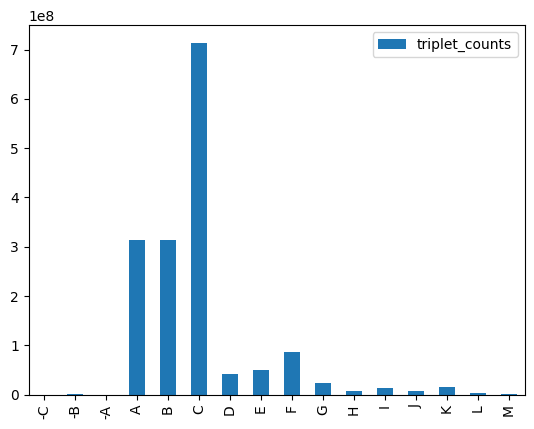

In [12]:
df.plot.bar()

In [2]:
import pickle

In [44]:
# File path where you want to store the dictionary
file_path = f'triplet_frequencies_{target}.pkl'

# Saving the dictionary to a file
with open(file_path, 'wb') as file:
    pickle.dump(frequencies, file)

print(f"Dictionary saved to {file_path}")

Dictionary saved to triplet_frequencies_cylinder300.pkl


In [ ]:
with open('triplet_frequencies_cylinder300.pkl','rb') as f:
    frequencies = pickle.load(f)

In [ ]:
len(frequencies)

In [ ]:
import